In [1]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from dateutil.parser import parse 

In [3]:
# Define functions

start_date = datetime.datetime(1993,1,1)
end_date = datetime.datetime(2000,1,1)

# for plotting histogram.
def histogram(df, col_name, bins):
    plt.hist(df[col_name], alpha=0.5, label=col_name, bins=bins)
    plt.legend(loc='upper right')
    plt.show()

# to convert a date to age at end_date.
def convert_to_age_days(x):
    td = end_date - x
    return td.days

# to convert a date to days after start_date.
def convert_date_to_days(x):
    td = x - start_date
    return td.days
# Get relevant info: age of client

# returns the middle two digits of a six digit integer.
def get_mid2_dig(x):
    return int(x/100) % 100

# returns the month of birth_number.
def get_month(x):
    mth = get_mid2_dig(x)
    if mth > 50:
        return mth - 50
    else:
        return mth

# returns the month of birth_number.
def get_day(x):
    return x % 100

# returns the year of birth_number.
def get_year(x):
    return int(x/10000)

# returns the gender by examining birth_number.
def get_gender(x):
    mth = get_mid2_dig(x)
    if mth > 50:
        return 'F'
    else:
        return 'M'

# converts birth_number into age.
def convert_birthday_to_age(x):
    yr = get_year(x) + 1900
    mth = get_month(x)
    day = get_day(x)
    return convert_to_age_days(datetime.datetime(yr,mth,day))/365


# converts the date number into a date.
def convert_int_to_date(x):
    yr = get_year(x) + 1900
    mth = get_month(x)
    day = get_day(x)
    return datetime.datetime(yr, mth, day)

In [4]:
### Clean the "ACCOUNT" dataset ###

account_df = pd.read_csv('account.csv', sep = ';', parse_dates=['date'], low_memory=False)
account_df.head()

account_id  district_id         frequency       date
0         576           55  POPLATEK MESICNE 1993-01-01
1        3818           74  POPLATEK MESICNE 1993-01-01
2         704           55  POPLATEK MESICNE 1993-01-01
3        2378           16  POPLATEK MESICNE 1993-01-01
4        2632           24  POPLATEK MESICNE 1993-01-02

In [5]:
#account_df['creation_date'] = account_df['date'].map(convert_int_to_date)
account_df['creation_date'] = account_df['date']
account_df['days_after_start_date'] = account_df['creation_date'].map(convert_date_to_days)
del account_df['date']

account_df.head()

account_id  district_id         frequency creation_date  \
0         576           55  POPLATEK MESICNE    1993-01-01   
1        3818           74  POPLATEK MESICNE    1993-01-01   
2         704           55  POPLATEK MESICNE    1993-01-01   
3        2378           16  POPLATEK MESICNE    1993-01-01   
4        2632           24  POPLATEK MESICNE    1993-01-02   

   days_after_start_date  
0                      0  
1                      0  
2                      0  
3                      0  
4                      1

In [6]:
# translate 'frequency' to English.
def convert_freq_to_eng(x):
    if x == 'POPLATEK MESICNE':
        return 'MONTHLY'
    elif x == 'POPLATEK TYDNE':
        return 'WEEKLY'
    elif x == 'POPLATEK PO OBRATU':
        return 'TRANSACTION'
    else:
        return 'UNKNOWN'
    
account_df['frequency'] = account_df['frequency'].map(convert_freq_to_eng)
account_df = account_df.rename(columns={'frequency': 'statement_freq'})
account_df.head()

account_id  district_id statement_freq creation_date  days_after_start_date
0         576           55        MONTHLY    1993-01-01                      0
1        3818           74        MONTHLY    1993-01-01                      0
2         704           55        MONTHLY    1993-01-01                      0
3        2378           16        MONTHLY    1993-01-01                      0
4        2632           24        MONTHLY    1993-01-02                      1

In [7]:
account_df.isnull().sum()

account_id               0
district_id              0
statement_freq           0
creation_date            0
days_after_start_date    0
dtype: int64

In [8]:
### Clean the "CARD" dataset ###

card_df = pd.read_csv('card.csv', sep = ';', parse_dates=['issued'], low_memory=False)
card_df.head()

card_id  disp_id     type     issued
0     1005     9285  classic 1993-11-07
1      104      588  classic 1994-01-19
2      747     4915  classic 1994-02-05
3       70      439  classic 1994-02-08
4      577     3687  classic 1994-02-15

In [9]:
card_df.dtypes

card_id             int64
disp_id             int64
type               object
issued     datetime64[ns]
dtype: object

In [10]:
#card_df['issued'] = pd.to_datetime(card_df['issued'].str[:6], format='%y%m%d')
card_df['type'] = card_df['type'].str.upper()

In [11]:
card_df['days_after_start_date'] = card_df['issued'].map(convert_date_to_days)
#del card_df['issued']

card_df.head()

card_id  disp_id     type     issued  days_after_start_date
0     1005     9285  CLASSIC 1993-11-07                    310
1      104      588  CLASSIC 1994-01-19                    383
2      747     4915  CLASSIC 1994-02-05                    400
3       70      439  CLASSIC 1994-02-08                    403
4      577     3687  CLASSIC 1994-02-15                    410

In [12]:
card_df.isnull().sum()

card_id                  0
disp_id                  0
type                     0
issued                   0
days_after_start_date    0
dtype: int64

In [13]:
### Clean the "CLIENT" dataset ###

client_df = pd.read_csv('client.csv', sep = ';', low_memory=False)
client_df.head()

client_id  birth_number  district_id
0          1        706213           18
1          2        450204            1
2          3        406009            1
3          4        561201            5
4          5        605703            5

In [14]:
client_df.dtypes

client_id       int64
birth_number    int64
district_id     int64
dtype: object

In [15]:
client_df['client_age'] = client_df['birth_number'].map(convert_birthday_to_age)
client_df['client_gender'] = client_df['birth_number'].map(get_gender)
del client_df['birth_number']

client_df['client_age'] = client_df['client_age'].round() 
client_df['client_age'] = client_df['client_age'].astype(int)

client_df.head()

client_id  district_id  client_age client_gender
0          1           18          29             F
1          2            1          55             M
2          3            1          59             F
3          4            5          43             M
4          5            5          40             F

In [16]:
client_df.isnull().sum()

client_id        0
district_id      0
client_age       0
client_gender    0
dtype: int64

In [17]:
### Clean the "DISP" dataset ###

disp_df = pd.read_csv('disp.csv', sep = ';', low_memory=False)
disp_df.head()

disp_id  client_id  account_id       type
0        1          1           1      OWNER
1        2          2           2      OWNER
2        3          3           2  DISPONENT
3        4          4           3      OWNER
4        5          5           3  DISPONENT

In [18]:
disp_df.isnull().sum()

disp_id       0
client_id     0
account_id    0
type          0
dtype: int64

In [19]:
disp_df['type'].value_counts()

OWNER        4500
DISPONENT     869
Name: type, dtype: int64

In [20]:
### Clean the "DISTRICT" dataset ###

district_df = pd.read_csv('district.csv', sep = ';', low_memory=False)
district_df.head()

A1           A2               A3       A4  A5  A6  A7  A8  A9    A10  \
0   1  Hl.m. Praha           Prague  1204953   0   0   0   1   1  100.0   
1   2      Benesov  central Bohemia    88884  80  26   6   2   5   46.7   
2   3       Beroun  central Bohemia    75232  55  26   4   1   5   41.7   
3   4       Kladno  central Bohemia   149893  63  29   6   2   6   67.4   
4   5        Kolin  central Bohemia    95616  65  30   4   1   6   51.4   

     A11   A12   A13  A14    A15    A16  
0  12541  0.29  0.43  167  85677  99107  
1   8507  1.67  1.85  132   2159   2674  
2   8980  1.95  2.21  111   2824   2813  
3   9753  4.64  5.05  109   5244   5892  
4   9307  3.85  4.43  118   2616   3040

In [21]:
print(district_df.dtypes)

A1       int64
A2      object
A3      object
A4       int64
A5       int64
A6       int64
A7       int64
A8       int64
A9       int64
A10    float64
A11      int64
A12     object
A13    float64
A14      int64
A15     object
A16      int64
dtype: object


In [22]:
district_df = district_df.rename(columns={'A1':'district_id', 'A2':'district_name', 'A3':'region', 'A4':'num_inhabitants', 'A5':'num_municipalities_lt499',
 'A6':'num_munipalities_500to1999', 'A7':'num_munipalities_2000to9999', 'A8':'num_munipalities_gt10000',
 'A9':'num_cities', 'A10':'ratio_urban', 'A11':'average_salary', 'A12':'unemployment_rate95', 'A13': 'unemployment_rate96',
 'A14':'num_entrep_per1000', 'A15':'num_crimes95', 'A16':'num_crimes96'})

district_df.head()

district_id district_name           region  num_inhabitants  \
0            1   Hl.m. Praha           Prague          1204953   
1            2       Benesov  central Bohemia            88884   
2            3        Beroun  central Bohemia            75232   
3            4        Kladno  central Bohemia           149893   
4            5         Kolin  central Bohemia            95616   

   num_municipalities_lt499  num_munipalities_500to1999  \
0                         0                           0   
1                        80                          26   
2                        55                          26   
3                        63                          29   
4                        65                          30   

   num_munipalities_2000to9999  num_munipalities_gt10000  num_cities  \
0                            0                         1           1   
1                            6                         2           5   
2                            4                         1           5   
3                            6                         2           6   
4                            4                         1           6   

   ratio_urban  average_salary unemployment_rate95  unemployment_rate96  \
0        100.0           12541                0.29                 0.43   
1         46.7            8507                1.67                 1.85   
2         41.7            8980                1.95                 2.21   
3         67.4            9753                4.64                 5.05   
4         51.4            9307                3.85                 4.43   

   num_entrep_per1000 num_crimes95  num_crimes96  
0                 167        85677         99107  
1                 132         2159          2674  
2                 111         2824          2813  
3                 109         5244          5892  
4                 118         2616          3040

In [23]:
def convert_question_marks(x, typ):
    if x == '?':
        return -1
    elif typ == 'float':
        return float(x)
    else:
        return int(x)
    
district_df['unemployment_rate95'] = district_df['unemployment_rate95'].apply(convert_question_marks, args=('float',))
district_df['num_crimes95'] = district_df['num_crimes95'].apply(convert_question_marks, args=('int',))
print(district_df.dtypes)

district_id                      int64
district_name                   object
region                          object
num_inhabitants                  int64
num_municipalities_lt499         int64
num_munipalities_500to1999       int64
num_munipalities_2000to9999      int64
num_munipalities_gt10000         int64
num_cities                       int64
ratio_urban                    float64
average_salary                   int64
unemployment_rate95            float64
unemployment_rate96            float64
num_entrep_per1000               int64
num_crimes95                     int64
num_crimes96                     int64
dtype: object


In [24]:
### Clean the "LOAN" dataset ###

loan_df = pd.read_csv('loan.csv', sep = ';', parse_dates=['date'],low_memory=False)
loan_df.head()

loan_id  account_id       date  amount  duration  payments status
0     5314        1787 1993-07-05   96396        12    8033.0      B
1     5316        1801 1993-07-11  165960        36    4610.0      A
2     6863        9188 1993-07-28  127080        60    2118.0      A
3     5325        1843 1993-08-03  105804        36    2939.0      A
4     7240       11013 1993-09-06  274740        60    4579.0      A

In [25]:
loan_df['loan_issued_date'] = loan_df['date']
loan_df['days_after_start_date'] = loan_df['loan_issued_date'].map(convert_date_to_days)
del loan_df['date']
loan_df = loan_df.rename(columns={'payments':'monthly_loan_payment', 'status':'loan_status'})

loan_df.head()

loan_id  account_id  amount  duration  monthly_loan_payment loan_status  \
0     5314        1787   96396        12                8033.0           B   
1     5316        1801  165960        36                4610.0           A   
2     6863        9188  127080        60                2118.0           A   
3     5325        1843  105804        36                2939.0           A   
4     7240       11013  274740        60                4579.0           A   

  loan_issued_date  days_after_start_date  
0       1993-07-05                    185  
1       1993-07-11                    191  
2       1993-07-28                    208  
3       1993-08-03                    214  
4       1993-09-06                    248

In [26]:
loan_df.isnull().sum()

loan_id                  0
account_id               0
amount                   0
duration                 0
monthly_loan_payment     0
loan_status              0
loan_issued_date         0
days_after_start_date    0
dtype: int64

In [27]:
### Clean the "ORDER" dataset ###

order_df = pd.read_csv('order.csv', sep = ';', low_memory=False)
order_df.head()

order_id  account_id bank_to  account_to  amount k_symbol
0     29401           1      YZ    87144583  2452.0     SIPO
1     29402           2      ST    89597016  3372.7     UVER
2     29403           2      QR    13943797  7266.0     SIPO
3     29404           3      WX    83084338  1135.0     SIPO
4     29405           3      CD    24485939   327.0

In [28]:
# translate 'k_symbol' to English.
def convert_k_symbol_to_eng(x):
    if x == 'POJISTNE':
        return 'INSURANCE_PAYMENT'
    elif x == 'SIPO':
        return 'HOUSEHOLD_PAYMENT'
    elif x == 'LEASING':
        return 'LEASING_PAYMENT'
    elif x == 'UVER':
        return 'LOAN_PAYMENT'
    else:
        return 'UNKNOWN'
    
order_df['k_symbol'] = order_df['k_symbol'].map(convert_k_symbol_to_eng)
order_df.head()  

order_id  account_id bank_to  account_to  amount           k_symbol
0     29401           1      YZ    87144583  2452.0  HOUSEHOLD_PAYMENT
1     29402           2      ST    89597016  3372.7       LOAN_PAYMENT
2     29403           2      QR    13943797  7266.0  HOUSEHOLD_PAYMENT
3     29404           3      WX    83084338  1135.0  HOUSEHOLD_PAYMENT
4     29405           3      CD    24485939   327.0            UNKNOWN

In [29]:
order_df.isnull().sum()

order_id      0
account_id    0
bank_to       0
account_to    0
amount        0
k_symbol      0
dtype: int64

In [30]:
### Clean the "TRANS" dataset ###

trans_df = pd.read_csv('trans.csv', sep = ';', parse_dates=['date'], low_memory=False)
trans_df.head()

trans_id  account_id       date    type operation  amount  balance  \
0    695247        2378 1993-01-01  PRIJEM     VKLAD   700.0    700.0   
1    171812         576 1993-01-01  PRIJEM     VKLAD   900.0    900.0   
2    207264         704 1993-01-01  PRIJEM     VKLAD  1000.0   1000.0   
3   1117247        3818 1993-01-01  PRIJEM     VKLAD   600.0    600.0   
4    579373        1972 1993-01-02  PRIJEM     VKLAD   400.0    400.0   

  k_symbol bank  account  
0      NaN  NaN      NaN  
1      NaN  NaN      NaN  
2      NaN  NaN      NaN  
3      NaN  NaN      NaN  
4      NaN  NaN      NaN

In [31]:
trans_df.isnull().sum()

trans_id           0
account_id         0
date               0
type               0
operation     183114
amount             0
balance            0
k_symbol      481881
bank          782812
account       760931
dtype: int64

In [32]:
def convert_trans_type_to_eng(x):
    if x == 'PRIJEM':
        return 'CREDIT'
    elif x == 'VYDAJ':
        return 'WITHDRAWAL'
    else:
        return 'UNKNOWN'
    
def convert_trans_op_to_eng(x):
    if x == 'VYBER KARTOU':
        return 'CC_WITHDRAWAL'
    elif x == 'VKLAD':
        return 'CREDIT_IN_CASH'
    elif x == 'PREVOD Z UCTU':
        return 'COLLECTION_FROM_OTHER_BANK'
    elif x == 'VYBER':
        return 'WITHDRAWAL_IN_CASH'
    elif x == 'PREVOD NA UCET':
        return 'REMITTANCE_TO_OTHER_BANK'    
    else:
        return 'UNKNOWN'
    
def convert_trans_k_symbol_to_eng(x):
    if x == 'POJISTNE':
        return 'INSURANCE_PAYMENT'
    elif x == 'SLUZBY':
        return 'PAYMENT_FOR_STATEMENT'
    elif x == 'UROK':
        return 'INTEREST_CREDITED'
    elif x == 'SANKC. UROK':
        return 'SANCTION_INTEREST'
    elif x == 'SIPO':
        return 'HOUSEHOLD'
    elif x == 'DUCHOD':
        return 'OLD_AGE_PENSION'  
    elif x == 'UVER':
        return 'LOAN_PAYMENT'      
    else:
        return 'UNKNOWN'

    
trans_df['type'] = trans_df['type'].map(convert_trans_type_to_eng)
trans_df['operation'] = trans_df['operation'].map(convert_trans_op_to_eng)
trans_df['k_symbol'] = trans_df['k_symbol'].map(convert_trans_k_symbol_to_eng)


In [33]:
trans_df.head()

trans_id  account_id       date    type       operation  amount  balance  \
0    695247        2378 1993-01-01  CREDIT  CREDIT_IN_CASH   700.0    700.0   
1    171812         576 1993-01-01  CREDIT  CREDIT_IN_CASH   900.0    900.0   
2    207264         704 1993-01-01  CREDIT  CREDIT_IN_CASH  1000.0   1000.0   
3   1117247        3818 1993-01-01  CREDIT  CREDIT_IN_CASH   600.0    600.0   
4    579373        1972 1993-01-02  CREDIT  CREDIT_IN_CASH   400.0    400.0   

  k_symbol bank  account  
0  UNKNOWN  NaN      NaN  
1  UNKNOWN  NaN      NaN  
2  UNKNOWN  NaN      NaN  
3  UNKNOWN  NaN      NaN  
4  UNKNOWN  NaN      NaN

In [34]:
### Quality check ###

In [35]:
loan_df.head()

loan_id  account_id  amount  duration  monthly_loan_payment loan_status  \
0     5314        1787   96396        12                8033.0           B   
1     5316        1801  165960        36                4610.0           A   
2     6863        9188  127080        60                2118.0           A   
3     5325        1843  105804        36                2939.0           A   
4     7240       11013  274740        60                4579.0           A   

  loan_issued_date  days_after_start_date  
0       1993-07-05                    185  
1       1993-07-11                    191  
2       1993-07-28                    208  
3       1993-08-03                    214  
4       1993-09-06                    248

In [36]:
account_df.head()

account_id  district_id statement_freq creation_date  days_after_start_date
0         576           55        MONTHLY    1993-01-01                      0
1        3818           74        MONTHLY    1993-01-01                      0
2         704           55        MONTHLY    1993-01-01                      0
3        2378           16        MONTHLY    1993-01-01                      0
4        2632           24        MONTHLY    1993-01-02                      1

In [38]:
missing_account_ids = np.isin(loan_df['account_id'], account_df['account_id'], invert=True).sum()
print('Missing account ids in loan_df: {}'.format(missing_account_ids))

Missing account ids in loan_df: 0


In [45]:
# There's only one loan per account
account_duplicates = loan_df.account_id.value_counts()
account_duplicates[account_duplicates > 1]

Series([], Name: account_id, dtype: int64)


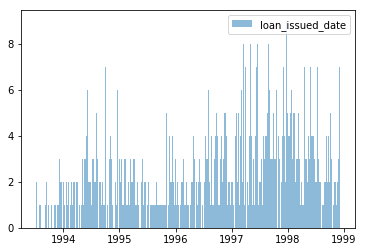

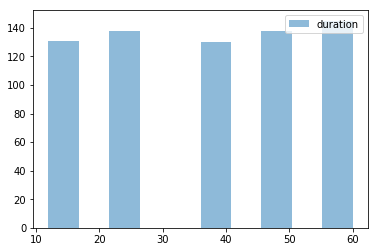

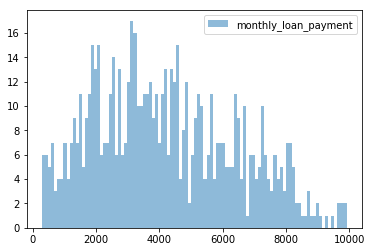

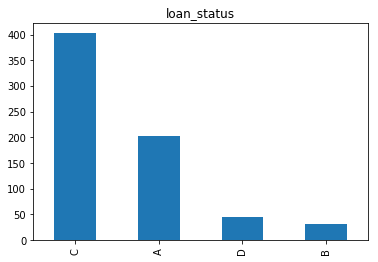

In [47]:
# look at date.
histogram(loan_df, 'loan_issued_date', 300)
    
# look at loan_duration. Analyze
histogram(loan_df, 'duration', 10)

# look at monthly_loan_payment. Frequency?
histogram(loan_df, 'monthly_loan_payment', 100)

# look at loan_status.
#
# 'A stands for contract finished, no problems,
# 'B' stands for contract finished, loan not paid,
# 'C' stands for running contract, OK so far,
# 'D' stands for running contract, client in debt

def convert_loan_status(x):
    if x == 'A':
        return 'Finished'
    elif x == 'B':
        return 'Not_paid'
    elif x == 'C':
        return 'Ongoing'
    elif x == 'D':
        return 'In_debt'

loan_df['loan_status'].value_counts().plot(kind='bar', subplots=True) #place labels    
loan_df['loan_status'] = loan_df['loan_status'].map(convert_loan_status)  


In [48]:
# There can be multiple orders per account
orders_per_account = order_df.account_id.value_counts()
orders_per_account[orders_per_account > 1]

5591     5
1766     5
7465     5
97       5
1318     5
368      5
173      5
5072     5
7133     5
3834     5
4415     5
4418     5
365      5
10404    5
10233    5
7181     5
11362    5
689      5
5952     5
10063    5
3935     5
2482     5
2932     5
3872     5
8261     5
2247     5
3754     5
2982     5
5066     5
3467     5
        ..
619      2
2778     2
10439    2
3950     2
1903     2
1907     2
1915     2
2670     2
1919     2
623      2
627      2
4725     2
3986     2
2882     2
2042     2
3471     2
863      2
1759     2
9677     2
3507     2
3774     2
3479     2
3798     2
503      2
2902     2
1747     2
3487     2
3778     2
9673     2
2890     2
Name: account_id, Length: 1655, dtype: int64

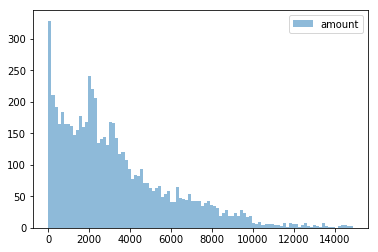

In [49]:
#Higher frequency near amount 0 and spikes near amount 2000
histogram(order_df, 'amount', 100)

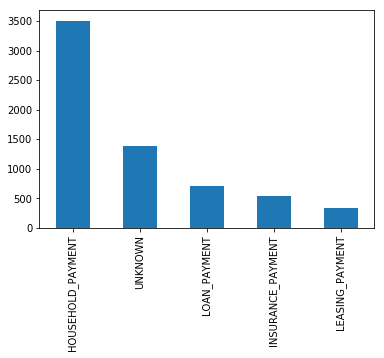

In [50]:
# Most payments are "Household payments"    
order_df['k_symbol'].value_counts().plot(kind='bar')

In [51]:
trans_df.head()

trans_id  account_id       date    type       operation  amount  balance  \
0    695247        2378 1993-01-01  CREDIT  CREDIT_IN_CASH   700.0    700.0   
1    171812         576 1993-01-01  CREDIT  CREDIT_IN_CASH   900.0    900.0   
2    207264         704 1993-01-01  CREDIT  CREDIT_IN_CASH  1000.0   1000.0   
3   1117247        3818 1993-01-01  CREDIT  CREDIT_IN_CASH   600.0    600.0   
4    579373        1972 1993-01-02  CREDIT  CREDIT_IN_CASH   400.0    400.0   

  k_symbol bank  account  
0  UNKNOWN  NaN      NaN  
1  UNKNOWN  NaN      NaN  
2  UNKNOWN  NaN      NaN  
3  UNKNOWN  NaN      NaN  
4  UNKNOWN  NaN      NaN

In [52]:
# Are there missing accounts in trans_df
missing_account_ids = np.isin(trans_df['account_id'], account_df['account_id'], invert=True).sum()
print('Missing account ids in trans_df: {}'.format(missing_account_ids))

Missing account ids in trans_df: 0


In [54]:
# Are there account that made no transactions
no_transactions = np.isin(account_df['account_id'], trans_df['account_id'], invert=True).sum()
print('No transactions made with the following number of accounts: {}'.format(no_transactions))

No transactions made with the following number of accounts: 0


In [55]:
#How many transactions per account on average
trx_per_account = len(trans_df)/len(account_df)
print('transactions/account: {}'.format(trx_per_account))


transactions/account: 234.73777777777778


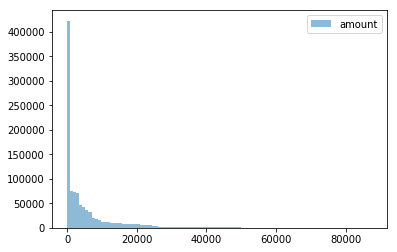

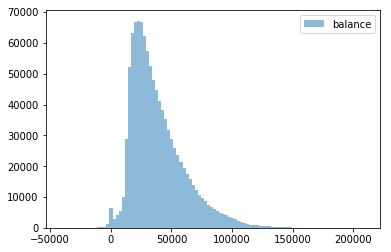

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002089AAF70F0>],
      dtype=object)

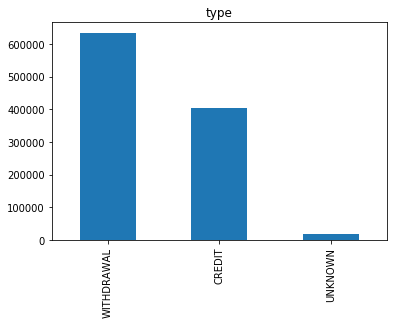

In [171]:
# The most frequent transactions are done with amounts that are lower than 20'000
histogram(trans_df, 'amount', 100)

# Balance after transactions is rarely below 0
histogram(trans_df, 'balance', 100)

# There are more cash withdrawals than credits
trans_df['type'].value_counts().plot(kind='bar', subplots=True)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E49806D780>],
      dtype=object)

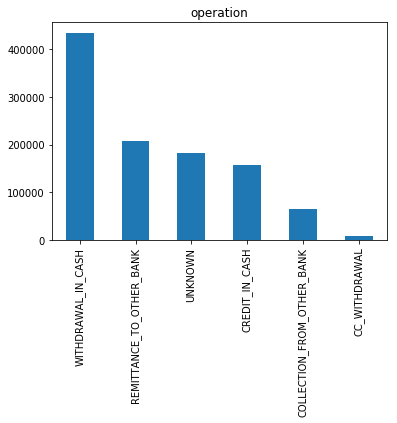

In [56]:
# There are mostly withdrawals in cash and remitance to other banks. Unknown operations should be removed
trans_df['operation'].value_counts().plot(kind='bar', subplots=True)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4980CD048>],
      dtype=object)

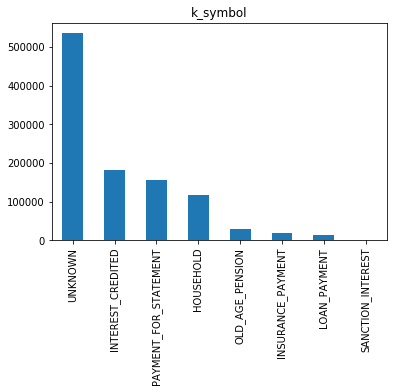

In [57]:
# Other unknown transaction types

trans_df['k_symbol'].value_counts().plot(kind='bar', subplots=True)

dispositions/account: 1.193111111111111


OWNER        4500
DISPONENT     869
Name: type, dtype: int64

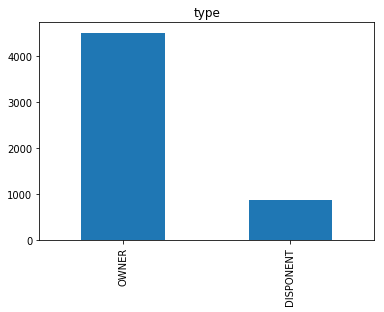

In [58]:
# Dispositions

disp_per_account = len(disp_df)/len(account_df)
print('dispositions/account: {}'.format(disp_per_account))
disp_df['type'].value_counts().plot(kind='bar', subplots=True)
disp_df['type'].value_counts()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4980CD6A0>],
      dtype=object)

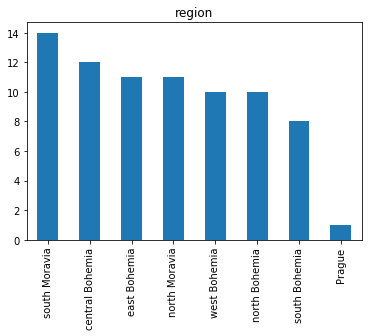

In [59]:
# District

district_df['region'].value_counts().plot(kind='bar', subplots=True)


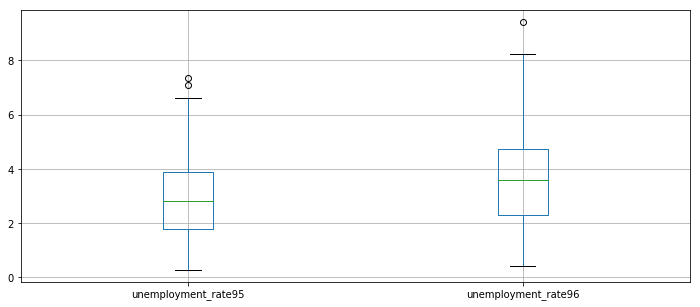

In [60]:
# Analyze - unemployment rates -
# Normally an unemplyment rate of 4 to 6% is healthy. 
# We have no data for years '93, '94, '97, '98 but we can consider official sources 

fig, axes = plt.subplots(figsize=(12, 5), sharey=True)
district_df.loc[district_df['unemployment_rate95'] > 0, ['unemployment_rate95', 'unemployment_rate96']].boxplot(return_type='axes')

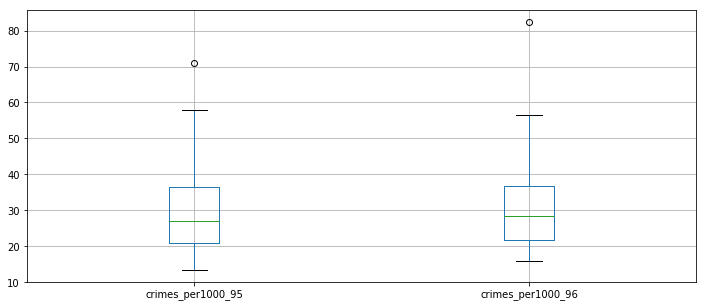

In [177]:
# Analyze - crime rates -

district_df['crimes_per1000_95'] = district_df['num_crimes95']/district_df['num_inhabitants']*1000
district_df['crimes_per1000_96'] = district_df['num_crimes96']/district_df['num_inhabitants']*1000

fig, axes = plt.subplots(figsize=(12, 5), sharey=True)
district_df.loc[district_df['num_crimes95'] > 0 ,['crimes_per1000_95', 'crimes_per1000_96']].boxplot(return_type='axes')

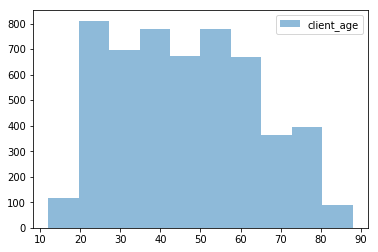

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E496D24550>],
      dtype=object)

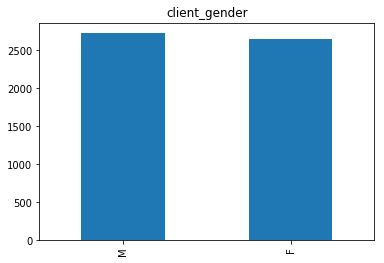

In [62]:
# Customers that are working age have the most accounts, equally men and women 

histogram(client_df, 'client_age', 10)
client_df['client_gender'].value_counts().plot(kind='bar', subplots=True)

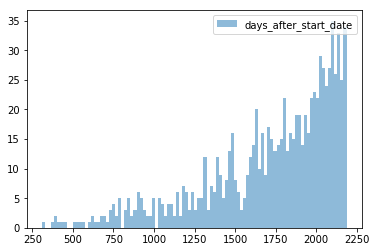

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E496644828>],
      dtype=object)

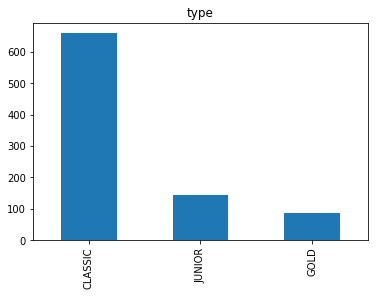

In [63]:
# The majority of cards were issued more than one year ago
histogram(card_df, 'days_after_start_date', 100)
card_df['type'].value_counts().plot(kind='bar', subplots=True)

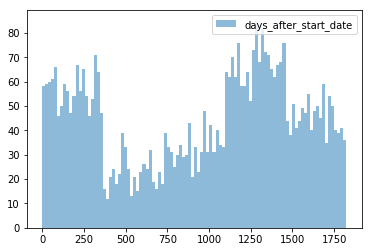

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E496948A90>],
      dtype=object)

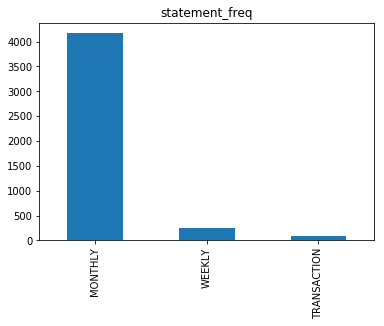

In [64]:
# There were more accounts created in the past year and 3 years ago
histogram(account_df, 'days_after_start_date', 100)
account_df['statement_freq'].value_counts().plot(kind='bar', subplots=True)

In [65]:
# Keep for data exploration
account_df.to_pickle('dataset/account.pkl')
loan_df.to_pickle('dataset/loan.pkl')
order_df.to_pickle('dataset/order.pkl')
trans_df.to_pickle('dataset/trans.pkl')
disp_df.to_pickle('dataset/disp.pkl')
district_df.to_pickle('dataset/district.pkl')
client_df.to_pickle('dataset/client.pkl')
card_df.to_pickle('dataset/card.pkl')

In [66]:
# Keep for db upload
account_df.to_csv('dataset/account.csv')
loan_df.to_csv('dataset/loan.csv')
order_df.to_csv('dataset/order.csv')
trans_df.to_csv('dataset/trans.csv')
disp_df.to_csv('dataset/disp.csv')
district_df.to_csv('dataset/district.csv')
client_df.to_csv('dataset/client.csv')
card_df.to_csv('dataset/card.csv')

In [182]:
account_df.head()

account_id  district_id statement_freq creation_date  days_after_start_date
0         576           55        MONTHLY    1993-01-01                      0
1        3818           74        MONTHLY    1993-01-01                      0
2         704           55        MONTHLY    1993-01-01                      0
3        2378           16        MONTHLY    1993-01-01                      0
4        2632           24        MONTHLY    1993-01-02                      1

In [183]:
card_df.head()

card_id  disp_id     type  days_after_start_date
0     1005     9285  classic                    310
1      104      588  classic                    383
2      747     4915  classic                    400
3       70      439  classic                    403
4      577     3687  classic                    410

In [184]:
client_df.head()

client_id  district_id  client_age client_gender
0          1           18          29             F
1          2            1          55             M
2          3            1          59             F
3          4            5          43             M
4          5            5          40             F

In [185]:
disp_df.head()

disp_id  client_id  account_id       type
0        1          1           1      OWNER
1        2          2           2      OWNER
2        3          3           2  DISPONENT
3        4          4           3      OWNER
4        5          5           3  DISPONENT

In [186]:
district_df.head()

district_id district_name           region  num_inhabitants  \
0            1   Hl.m. Praha           Prague          1204953   
1            2       Benesov  central Bohemia            88884   
2            3        Beroun  central Bohemia            75232   
3            4        Kladno  central Bohemia           149893   
4            5         Kolin  central Bohemia            95616   

   num_municipalities_gt499  num_munipalities_500to1999  \
0                         0                           0   
1                        80                          26   
2                        55                          26   
3                        63                          29   
4                        65                          30   

   num_munipalities_2000to9999  num_munipalities_gt10000  num_cities  \
0                            0                         1           1   
1                            6                         2           5   
2                            4                         1           5   
3                            6                         2           6   
4                            4                         1           6   

   ratio_urban  average_salary  unemployment_rate95  unemployment_rate96  \
0        100.0           12541                 0.29                 0.43   
1         46.7            8507                 1.67                 1.85   
2         41.7            8980                 1.95                 2.21   
3         67.4            9753                 4.64                 5.05   
4         51.4            9307                 3.85                 4.43   

   num_entrep_per1000  num_crimes95  num_crimes96  crimes_per1000_95  \
0                 167         85677         99107          71.104018   
1                 132          2159          2674          24.290086   
2                 111          2824          2813          37.537218   
3                 109          5244          5892          34.984956   
4                 118          2616          3040          27.359438   

   crimes_per1000_96  
0          82.249681  
1          30.084155  
2          37.391004  
3          39.308040  
4          31.793842

In [187]:
loan_df.head()

loan_id  account_id  amount  duration  monthly_loan_payment loan_status  \
0     5314        1787   96396        12                8033.0    Not_paid   
1     5316        1801  165960        36                4610.0    Finished   
2     6863        9188  127080        60                2118.0    Finished   
3     5325        1843  105804        36                2939.0    Finished   
4     7240       11013  274740        60                4579.0    Finished   

  loan_issued_date  days_after_start_date  
0       1993-07-05                    185  
1       1993-07-11                    191  
2       1993-07-28                    208  
3       1993-08-03                    214  
4       1993-09-06                    248

In [188]:
order_df.head()

order_id  account_id bank_to  account_to  amount           k_symbol
0     29401           1      YZ    87144583  2452.0  HOUSEHOLD_PAYMENT
1     29402           2      ST    89597016  3372.7       LOAN_PAYMENT
2     29403           2      QR    13943797  7266.0  HOUSEHOLD_PAYMENT
3     29404           3      WX    83084338  1135.0  HOUSEHOLD_PAYMENT
4     29405           3      CD    24485939   327.0            UNKNOWN

In [189]:
trans_df.head()

trans_id  account_id       date    type       operation  amount  balance  \
0    695247        2378 1993-01-01  CREDIT  CREDIT_IN_CASH   700.0    700.0   
1    171812         576 1993-01-01  CREDIT  CREDIT_IN_CASH   900.0    900.0   
2    207264         704 1993-01-01  CREDIT  CREDIT_IN_CASH  1000.0   1000.0   
3   1117247        3818 1993-01-01  CREDIT  CREDIT_IN_CASH   600.0    600.0   
4    579373        1972 1993-01-02  CREDIT  CREDIT_IN_CASH   400.0    400.0   

  k_symbol bank  account  
0  UNKNOWN  NaN      NaN  
1  UNKNOWN  NaN      NaN  
2  UNKNOWN  NaN      NaN  
3  UNKNOWN  NaN      NaN  
4  UNKNOWN  NaN      NaN